### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
pd.set_option('display.max_columns', None)

import wrds

### Load data

In [2]:
df= pd.read_csv("compustat_from_1990.csv")
print(df.shape)
df.head()

(211957, 13)


,conm,gvkey,cik,datadate,au,fyear,at,sale,ni,ib,oancf,sich,mv
0,AAR CORP,1004,1750.0,1991-05-31,6.0,1990,379.958,466.542,14.801,14.801,36.891,5080.0,224.460360
1,AAR CORP,1004,1750.0,1992-05-31,6.0,1991,395.351,422.657,10.020,10.020,8.814,5080.0,204.699595
2,AAR CORP,1004,1750.0,1993-05-31,6.0,1992,365.151,382.780,0.283,0.283,16.806,5080.0,214.663477
3,AAR CORP,1004,1750.0,1994-05-31,6.0,1993,417.626,407.754,9.494,9.484,6.697,5080.0,228.648720
4,AAR CORP,1004,1750.0,1995-05-31,6.0,1994,425.814,451.395,10.463,10.463,15.255,5080.0,243.405235


### Define ROA= ni / at

In [3]:
df=df[['gvkey', 'fyear', 'ni', 'at']]
df['lag_at']= df.groupby('gvkey')['at'].shift(1)
df['ROA']= df['ni'] / df['lag_at']
df= df[df['ROA'].notnull()]
df.count()

gvkey     189430
fyear     189430
ni        189430
at        189393
lag_at    189430
ROA       189430
dtype: int64

### Trim outliers

In [4]:
df=df[abs(df.ROA)<0.5]
df.shape

(161558, 6)

### Histogram: 1990 ~ 2020

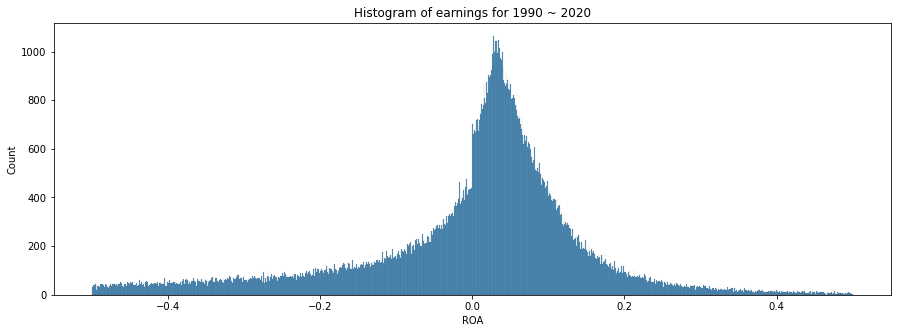

In [5]:
plt.figure(figsize=(15,5))
plt.title('Histogram of earnings for 1990 ~ 2020')
sns.histplot(data=df, x= 'ROA', binwidth= 0.001)
plt.show()

### Histogram: Sup-periods

6


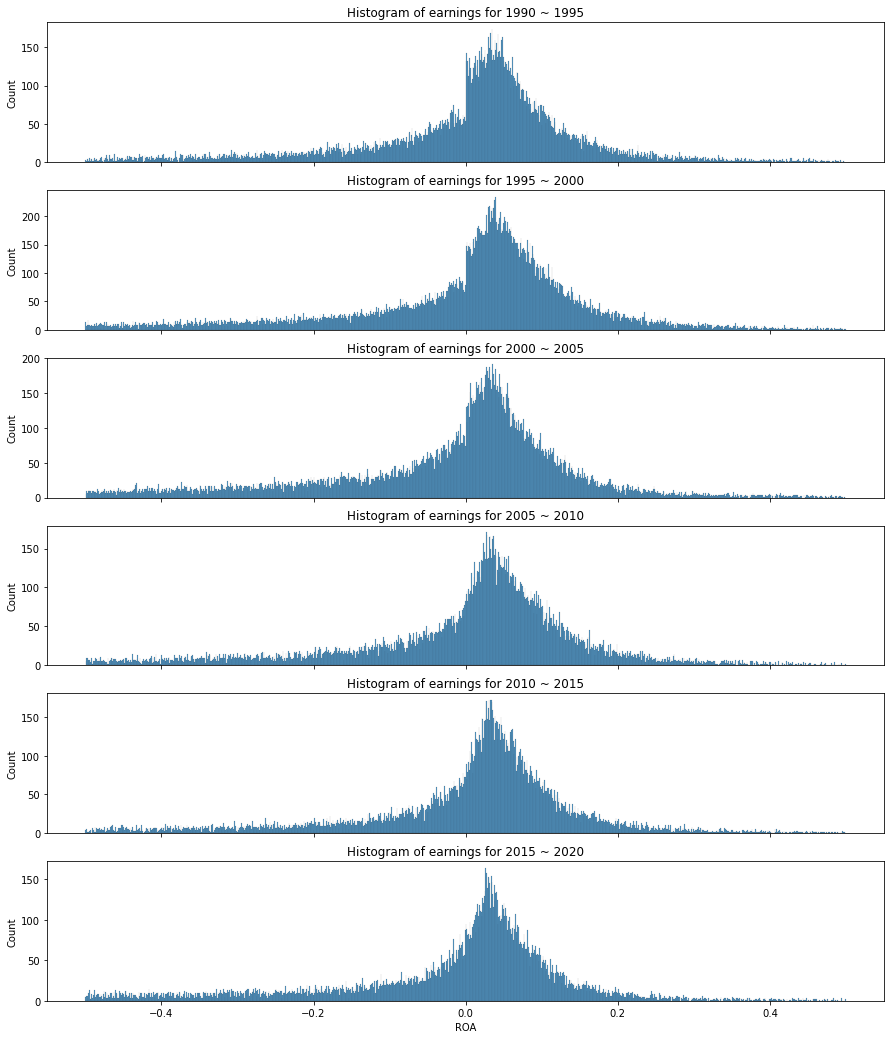

In [6]:
start_year= 1990
end_year= 2020
by= 5
var= 'ROA'
n= int((end_year - start_year)/by)
print(n)
fig, axes = plt.subplots(n, 1, figsize=(15, 3*n), sharex=True)
for i in range(n):
    y1= start_year + i*by
    y2= start_year + (i+1)*by
    sns.histplot(ax=axes[i], data=df[(df.fyear>= y1 ) & (df.fyear< y2)], x= var, binwidth= 0.001)
    axes[i].set_title(f"Histogram of earnings for {y1} ~ {y2}")